In [67]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *



In [7]:
cnx=sqlite3.connect('database.sqlite')
df=pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)

In [8]:
df.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [10]:
df.isnull()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().any().any(),df.shape

(True, (183978, 42))

In [12]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [13]:
# fixing null values
rows=df.shape[0]
df=df.dropna()

In [15]:
df.isnull().any().any(),df.shape

(False, (180354, 42))

In [16]:
# rows with null values
rows-df.shape[0]

3624

In [17]:
# shuffling the rows of the df to get
# a distributed sampe when the top rows are displayed
df=df.reindex(np.random.permutation(df.index))

In [18]:
df


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
161135,161136,135697,38578,2015-02-13 00:00:00,79.0,79.0,right,medium,medium,66.0,...,76.0,77.0,25.0,29.0,27.0,11.0,5.0,10.0,14.0,11.0
108720,108721,113343,23686,2007-02-22 00:00:00,73.0,76.0,right,medium,medium,16.0,...,25.0,58.0,5.0,26.0,18.0,70.0,80.0,77.0,58.0,81.0
183453,183454,223339,570159,2015-10-16 00:00:00,71.0,77.0,right,high,low,67.0,...,58.0,69.0,17.0,21.0,18.0,8.0,9.0,15.0,13.0,14.0
37646,37647,207998,254472,2013-02-15 00:00:00,57.0,72.0,right,medium,medium,12.0,...,13.0,33.0,18.0,19.0,17.0,60.0,55.0,58.0,52.0,61.0
67392,67393,173228,40139,2011-08-30 00:00:00,69.0,72.0,left,medium,medium,79.0,...,58.0,38.0,61.0,66.0,68.0,6.0,8.0,7.0,8.0,12.0
152556,152557,184575,210398,2015-11-06 00:00:00,75.0,77.0,left,medium,medium,70.0,...,62.0,74.0,15.0,36.0,22.0,11.0,12.0,9.0,16.0,9.0
29311,29312,207918,304017,2013-03-08 00:00:00,62.0,70.0,right,high,low,36.0,...,47.0,73.0,21.0,16.0,14.0,9.0,15.0,7.0,15.0,8.0
183686,183687,41236,35724,2010-02-22 00:00:00,88.0,90.0,right,medium,low,75.0,...,80.0,91.0,24.0,43.0,28.0,12.0,24.0,72.0,24.0,24.0
180696,180697,200422,179179,2014-03-21 00:00:00,66.0,72.0,left,high,low,64.0,...,51.0,56.0,20.0,20.0,21.0,15.0,13.0,11.0,13.0,12.0
95074,95075,204247,281936,2015-10-09 00:00:00,75.0,83.0,right,high,medium,71.0,...,68.0,64.0,29.0,37.0,31.0,9.0,12.0,7.0,13.0,7.0


In [19]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
161135,161136,135697,38578,2015-02-13 00:00:00,79.0,79.0,right,medium,medium,66.0,...,76.0,77.0,25.0,29.0,27.0,11.0,5.0,10.0,14.0,11.0
108720,108721,113343,23686,2007-02-22 00:00:00,73.0,76.0,right,medium,medium,16.0,...,25.0,58.0,5.0,26.0,18.0,70.0,80.0,77.0,58.0,81.0
183453,183454,223339,570159,2015-10-16 00:00:00,71.0,77.0,right,high,low,67.0,...,58.0,69.0,17.0,21.0,18.0,8.0,9.0,15.0,13.0,14.0
37646,37647,207998,254472,2013-02-15 00:00:00,57.0,72.0,right,medium,medium,12.0,...,13.0,33.0,18.0,19.0,17.0,60.0,55.0,58.0,52.0,61.0
67392,67393,173228,40139,2011-08-30 00:00:00,69.0,72.0,left,medium,medium,79.0,...,58.0,38.0,61.0,66.0,68.0,6.0,8.0,7.0,8.0,12.0


In [20]:
df[:10][['penalties','overall_rating']]

,penalties,overall_rating
161135,77.0,79.0
108720,58.0,73.0
183453,69.0,71.0
37646,33.0,57.0
67392,38.0,69.0
152556,74.0,75.0
29311,73.0,62.0
183686,91.0,88.0
180696,56.0,66.0
95074,64.0,75.0


In [21]:
df['overall_rating'].corr(df['penalties'])

0.3927151079111884

In [22]:
potentialFeatures=['acceleration','curve','free_kick_accuracy','ball_control','shot_power','stamina']

In [25]:
for f in potentialFeatures:
    related=df['overall_rating'].corr(df[f])
    print(f"{f}:{related}")

acceleration:0.2439984883712964
curve:0.3575657691094528
free_kick_accuracy:0.3498003114423884
ball_control:0.44399076282629807
shot_power:0.42805313222193914
stamina:0.32560565778692413


In [27]:
cols=df.columns

In [28]:
cols

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [32]:
columns=['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [33]:
# create a list containing perason correlation between 'over_ratings'and each columns in columns

correlations=[df['overall_rating'].corr(df[f])for f in columns]

In [34]:
# making sure the number of the selected features and correlations are the same

len(columns),len(correlations)

(34, 34)

In [56]:
# creating a function for plotting a df with string columns and numeric values

def plot_df(df,y_label):
    color='blue'
    fig=plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    ax=df2.correlation.plot(linewidth=3.3,color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes,rotation=75);
    plt.show()


In [54]:
df2=pd.DataFrame({'attributes':columns,'correlation':correlations})


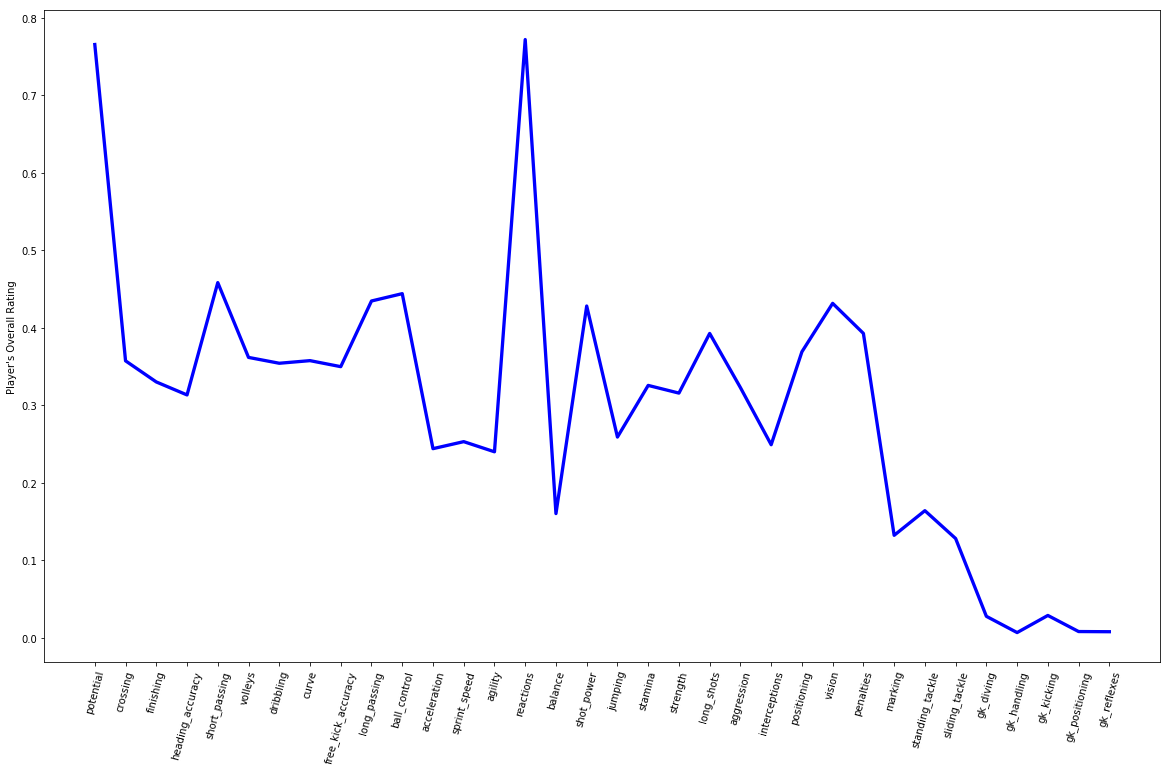

In [57]:
plot_df(df2,'Player\'s Overall Rating')

In [58]:
select5features=['gk_kicking','potential','marking','interceptions','standing_tackle']


In [59]:
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [61]:
# generate a new data frame by selecting the new 5 features
new_dataframe=df[select5features].copy(deep=True)


In [62]:
new_dataframe.head()


,gk_kicking,potential,marking,interceptions,standing_tackle
161135,10.0,79.0,25.0,28.0,29.0
108720,77.0,76.0,5.0,62.0,26.0
183453,15.0,77.0,17.0,22.0,21.0
37646,58.0,72.0,18.0,21.0,19.0
67392,7.0,72.0,61.0,67.0,66.0


In [63]:
#perform scaling on the dataframe containing the features
data=scale(new_dataframe)
# define numer of clusters
no_of_clusters=4
# Train models.
model=KMeans(init='k-means++',n_clusters=no_of_clusters,n_init=20).fit(data)

In [65]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')
pd.value_counts(model.labels_,sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    55903
1    50476
2    50198
3    23777
dtype: int64

In [70]:
# create a composite dataframe for plotting 
# use custom functions declared in the customplot.py
P=pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)

In [71]:
P


,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.477101,0.105743,-0.947630,-0.975204,-0.914202,0
1,-0.040340,0.704450,1.027860,0.982555,1.030287,1
2,-0.337584,-0.843429,0.548313,0.407446,0.550867,2
3,1.920631,0.037763,-1.111727,-0.653150,-1.200879,3


In [72]:
# plotting a graph inside the matplotlip
%matplotlib inline

/home/anilla/customplot.py:31: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


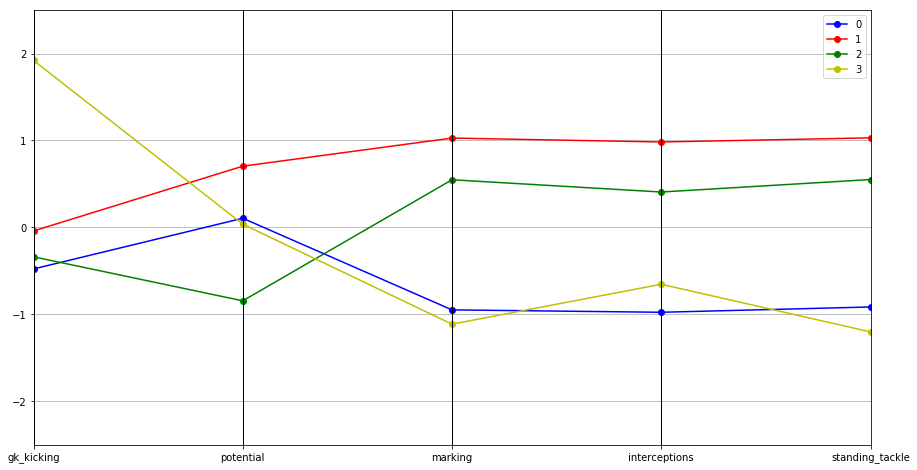

In [73]:
parallel_plot(P)